In [48]:
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
fb = pd.read_csv('facebook.csv')
fb.shape

(780, 7)

In [50]:
fb.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500
1,2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000
2,2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800
3,2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100
4,2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200


In [51]:
#Price Difference
fb['PriceDiff'] = fb['Close'].shift(-1) - fb['Close']
fb.head()

,Date,Open,High,Low,Close,Adj Close,Volume,PriceDiff
0,2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,0.080000
1,2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,-0.339998
2,2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,-0.600000
3,2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,-0.050002
4,2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,0.720002


In [52]:
#Daily Return
fb['Return'] = fb['PriceDiff'] /fb['Close']
fb.head()

,Date,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Return
0,2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,0.080000,0.003990
1,2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,-0.339998,-0.016890
2,2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,-0.600000,-0.030318
3,2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,-0.050002,-0.002606
4,2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,0.720002,0.037618


In [53]:
#Direction in which the stock is moving. 1 is for up and 0 for down.
fb['Direction'] = [1 if fb['PriceDiff'].loc[i] > 0 else 0 for i in fb.index ]
fb.head()

,Date,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Return,Direction
0,2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,0.080000,0.003990,1
1,2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,-0.339998,-0.016890,0
2,2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,-0.600000,-0.030318,0
3,2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,-0.050002,-0.002606,0
4,2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,0.720002,0.037618,1


In [54]:
#moving average
fb['MA40'] = fb['Close'].rolling(40).mean()
fb.head()

,Date,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Return,Direction,MA40
0,2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,0.080000,0.003990,1,NaN
1,2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,-0.339998,-0.016890,0,NaN
2,2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,-0.600000,-0.030318,0,NaN
3,2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,-0.050002,-0.002606,0,NaN
4,2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,0.720002,0.037618,1,NaN


In [55]:
#moving average
fb['MA200'] = fb['Close'].rolling(200).mean()
fb.head()

,Date,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Return,Direction,MA40,MA200
0,2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,0.080000,0.003990,1,NaN,NaN
1,2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,-0.339998,-0.016890,0,NaN,NaN
2,2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,-0.600000,-0.030318,0,NaN,NaN
3,2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,-0.050002,-0.002606,0,NaN,NaN
4,2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,0.720002,0.037618,1,NaN,NaN


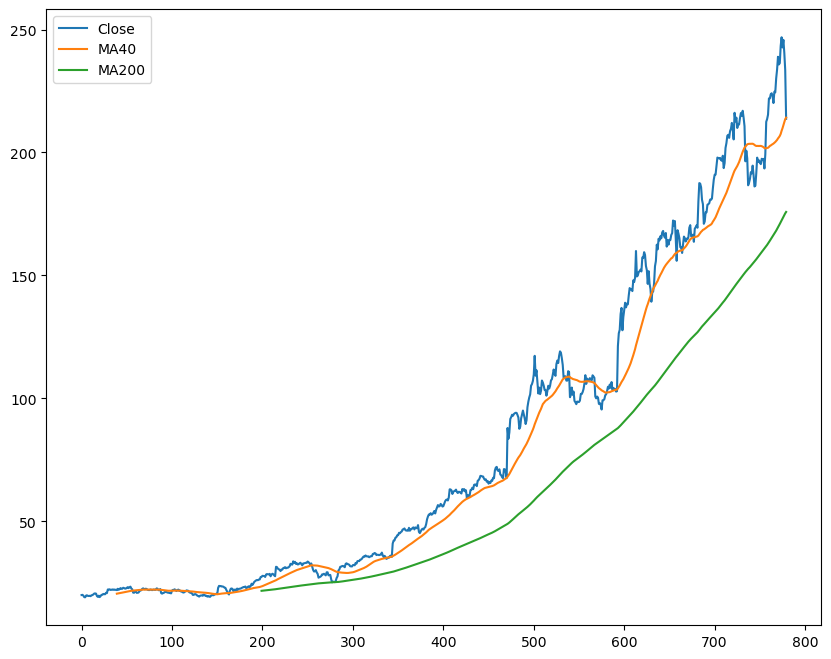

In [56]:
#visualising moving averages
plt.figure(figsize=(10, 8))
fb['Close'].plot(label='Close')
fb['MA40'].plot(label='MA40')
fb['MA200'].plot(label='MA200')
plt.legend()
plt.show()

In [57]:
#Here we observe that MA40 is the fast signal and MA200 is the slow signal

### Simple Trading Strategy

In this very simple strategy we buy a stock whenever the fast moving average is greater than slow moving average.

In [58]:
fb['MA10'] = fb['Close'].rolling(10).mean()
fb['MA50'] = fb['Close'].rolling(50).mean()
#fb = fb.dropna()
fb.head()

,Date,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Return,Direction,MA40,MA200,MA10,MA50
0,2014-12-31,20.400000,20.510000,19.990000,20.049999,19.459270,4157500,0.080000,0.003990,1,NaN,NaN,NaN,NaN
1,2015-01-02,20.129999,20.280001,19.809999,20.129999,19.536913,2842000,-0.339998,-0.016890,0,NaN,NaN,NaN,NaN
2,2015-01-05,20.129999,20.190001,19.700001,19.790001,19.206934,4948800,-0.600000,-0.030318,0,NaN,NaN,NaN,NaN
3,2015-01-06,19.820000,19.840000,19.170000,19.190001,18.624611,4944100,-0.050002,-0.002606,0,NaN,NaN,NaN,NaN
4,2015-01-07,19.330000,19.500000,19.080000,19.139999,18.576082,8045200,0.720002,0.037618,1,NaN,NaN,NaN,NaN


In [59]:
fb['Shares'] = [1 if fb.loc[i, 'MA10'] > fb.loc[i, 'MA50'] else 0 for i in fb.index]

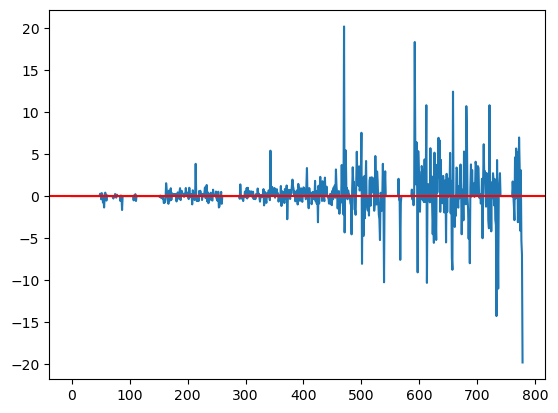

In [60]:
fb['Profit'] = [fb.loc[i, 'PriceDiff'] if fb.loc[i, 'Shares'] == 1 else 0 for i in fb.index]
fb['Profit'].plot()
plt.axhline(y=0, color='red')

Text(0.5, 1.0, 'Total money you win is 145.72000500000001')

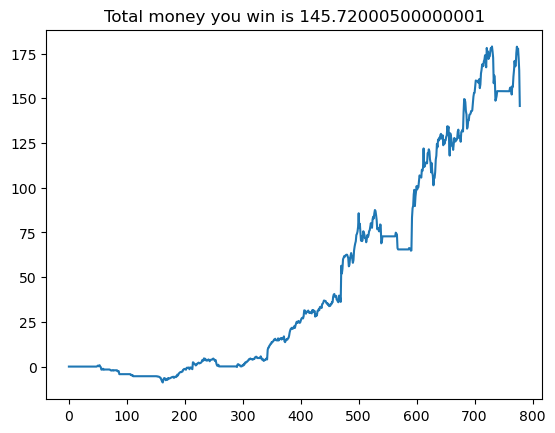

In [61]:
fb['wealth'] = fb['Profit'].cumsum()
fb['wealth'].plot()
plt.title('Total money you win is {}'.format(fb.loc[fb.index[-2], 'wealth']))